In [3]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
basic_url = "https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=189538&target=after&page="


In [4]:
comments = [ ]
cont = 0
for i in range(1,8):
    url = basic_url + str(i)
    page = urlopen(url)
    soup = BeautifulSoup(page, "html.parser")
    
    comment_all = soup.select('td.title > a.report')
    for comment in comment_all:
        result=comment["onclick"].split(",")[2]
        comments.append(result)
print(len(comments))
print(comments)

70
[" '그래서 이경영님 정체가 뭔데요 ???? 현기증난단 말이에요'", " '전 너무 재밌게 봤습니다.현실연기 기분좋게 봤네요'", " '내가 이걸 왜 시간들여 본건지'", " '연인관계일 뿐이니깐", " '연애와 영화의 공통적인 클리셰 혹은 반전'", " '셀레는 마음을 제대로 간접체험했어요셀레고싶은 분들 강추제목땜에 손해본듯'", " '일본영화 이니시에이션 러브랑 비슷해서 좀 실망'", " '현실적인 전개... 꿀잼'", " '생각지도 못한 엔딩이었다'", " ''", " 'ㅋㅋㅋㅋ진짜 반전5분이넹.  전 이걸 다보고 이해하는데 5분걸렸습니다. 뭐지? 뭐야? 응? 타임? 돌림판 아니였어? 응? 그 뚱이혁이가 그혁..  아놔...근데 이 씁씁한 외모지상주의....'", " '내가 잘할게 아니 나는 잘해줄게 절대 이런 잘못 하지 않을게 좀 더 좀 더 좀 더 많이 널 더 많이 생각하고 행동할게 사랑하니까 장혁이란 캐릭터는 항상 옆에 있는 사람을 잊지말라고 충고해주는 하나의 조언이었다'", " ''", " '채수빈 정수정 완전매력적이네'", " '잼 있네요... 반전도 재미있고.근데 우리 뚱뚱 혁이 오빠 출연진에 없네요...ㅋㅋ'", " '평범한 로맨스영화는 아니여서 로맨스영화 보고싶을 때 보면 괜찮을 것 같아요! 주연들이 너무 예쁘고 잘생겨서 얼굴만 보게되네요..'", " '웬만하면 사람들 생각은 틀린게 아니라 다른거니까... 존중한다가 제 인생철학인데요 이 영화를 재밌고 신선하다는 사람들은 뇌 어디 빼놓고 봄?완전 삼류영화'", " '여주머리 파마한거 보고 뒤에 내용 다 예측됐으나 그때부터 상황들을 비교하면서 볼수있어서 괜찮았던듯 넘 사실적이라 진짜 현실같아서 뭐라할수없는'", " '새…달…..시큼?ㅈㄴ시큼한데'", " '마지막 반전 하나로 영화에 대한 평이 180도 바뀜. 뻔한 스토리에서 참신한 스토리로.  이런 영화 매우 신선함. 배우들 보는 맛도 있고.'", " '와 진짜 재밌음.연기연출 뭐하나빠진게없어.그리고 군더더기없이 깔끔하고. 몇번이나봄ㅋㅋ 

In [5]:
import pandas as pd
dict_doc = {'text' : comments}
doc = pd.DataFrame(dict_doc)
doc.to_csv("새콤달콤리뷰.csv", index = False)

In [6]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [7]:
f = open('새콤달콤리뷰.csv', encoding='utf-8')
text = f.read()
f.close()

(-0.5, 399.5, 199.5, -0.5)

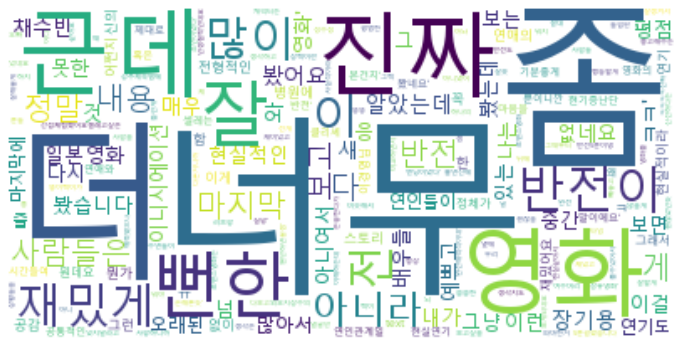

In [8]:
wcloud = WordCloud('c:/windows/fonts/malgun.ttf',background_color='white' ,max_words=1000, relative_scaling = 0.2).generate(text)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")

In [48]:
m_url = 'https://movie.naver.com/movie/running/current.nhn#'
page = urlopen(m_url)
soup = BeautifulSoup(page,"html.parser")
movies = soup.select('#content > div.article > div:nth-child(1) > div.lst_wrap > ul > li')
for movie in movies:
    
    title = movie.select_one(' dl > dt > a').text
    star = movie.select_one('li > dl > dd.star > dl.info_star > dd > div > a > span.num').text
    people = movie.select_one('li > dl > dd.star > dl.info_star > dd > div > a > span.num2').text
    rate = movie.select_one('li > dl > dd.star > dl.info_exp > dd > div > span.num')
    king = movie.select_one('li > dl > dd:nth-child(3)> dl > dd:nth-child(4) > span > a').text
    try:
        print(title, star, people, rate.text, king)
    except Exception as e:
        continue

크루엘라 9.33 참여 4,589명 19.65 크레이그 질레스피
콰이어트 플레이스 2 8.62 참여 318명 16.08 존 크래신스키
루카 9.07 참여 29명 15.43 엔리코 카사로사
극장판 귀멸의 칼날: 무한열차편 9.29 참여 12,374명 7.34 소토자키 하루오
컨저링 3: 악마가 시켰다 6.73 참여 1,758명 6.69 마이클 차베즈
여고괴담 여섯번째 이야기 : 모교 6.47 참여 49명 6.6 이미영
캐시트럭 8.21 참여 546명 5.74 가이 리치
분노의 질주: 더 얼티메이트 7.65 참여 5,405명 3.12 저스틴 린
뱅드림! 로젤리아 에피소드Ⅰ: 약속 8.52 참여 46명 1.83 코다이 카키모토
파이프라인 7.11 참여 1,325명 1.62 유하
아야와 마녀 7.38 참여 134명 1.41 미야자키 고로
클라이밍 7.36 참여 14명 1.33 김혜미
그 여름, 가장 차가웠던 10.00 참여 5명 0.83 주순
그레타 툰베리 7.75 참여 4명 0.79 나탄 그로스만
야구소녀 8.13 참여 905명 0.57 최윤태
노매드랜드 8.48 참여 567명 0.45 클로이 자오
프로페서 앤 매드맨 8.99 참여 87명 0.4 P.B. 셰므란
혼자 사는 사람들 8.78 참여 154명 0.36 홍성은
애플 7.85 참여 47명 0.29 크리스토스 니코우
인트로덕션 8.11 참여 61명 0.21 홍상수
500일의 썸머 8.43 참여 4,502명 0.21 마크 웹
낫아웃 8.75 참여 132명 0.21 이정곤
썰 6.85 참여 54명 0.21 황승재
굴뚝마을의 푸펠 9.05 참여 113명 0.21 히로타 유스케
까치발 8.86 참여 7명 0.19 권우정
레이니 데이 인 뉴욕 5.63 참여 696명 0.19 우디 앨런
#위왓치유 9.05 참여 20명 0.17 바르보라 차르포바
더 파더 8.91 참여 331명 0.17 플로리안 젤러
포겟 미 낫-엄마에게 쓰는 편지 9.25 참여 8명 0.12 선희 엥겔스토프
중경삼림 8.93 참여 2,556명 0.12 왕